In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download("stopwords")

In [3]:
df = pd.read_csv("Restaurant_Reviews.tsv", delimiter = '\t')

In [10]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [32]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [37]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

## Text cleansing

In [39]:
cleaned_df = []
for i in range(df.shape[0]):
    # we need only alphabets
    # mujay a-z yan A_Z k ilawa jo bhi usko space sa replace kr do
    review = re.sub("[^a-zA-Z]",' ',df.Review[i])
    # normalization (only lower case)
    review = review.lower()
    # tokanization 
    review = review.split()
    # remove stop words
    review = [word for word in review if not word in stopwords.words("english")]
    # Apply Stemming to get the root of the word
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review]
    review = ' '.join(review)
    
    cleaned_df.append(review)

## Creating Bag of model (text to integer)

In [79]:
# for encoding the text to integer
from sklearn.feature_extraction.text import CountVectorizer 

In [97]:
# Example
cv = CountVectorizer(max_features=1500) 

In [101]:
# X is a sparse matrix now
# fit: convert text into integer
# transform: do one hot encoding of that integer
# fit_transform : convert text into integer and do the one hot encoding of that integer simultaneosly

X = cv.fit_transform(cleaned_df).toarray() # features
encoding = cv.vocabulary_
y = df.iloc[:,-1].values # labels

## Train Test Split 

In [104]:
from sklearn.model_selection import train_test_split

In [120]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2, random_state  = 42)

## Choosing a model 

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [121]:
classifier = GaussianNB()
result = classifier.fit(X_train,Y_train)

In [122]:
# result on training data
# which is 91%
result.score(X_train,Y_train) 

0.91875

In [124]:
# 68%  will be acc on validation dataset
valid_result = np.mean(cross_val_score(classifier,X_train,Y_train,cv=10,scoring='accuracy')) 
valid_result

0.6838513830285983

In [125]:
# lets check on test data
y_pred = classifier.predict(X_test)
test_acc = accuracy_score(Y_test,y_pred)
test_acc # 67 %

0.67

In [129]:
matrix = confusion_matrix(Y_test,y_pred)

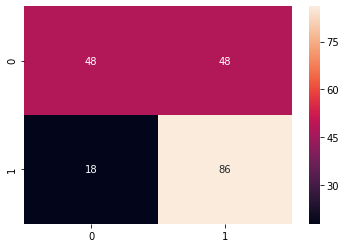

In [131]:
sns.heatmap(matrix,annot=True)